In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [142]:
data=pd.read_csv("/content/cirrhosis.csv")

data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


DATA VISUALIZATION


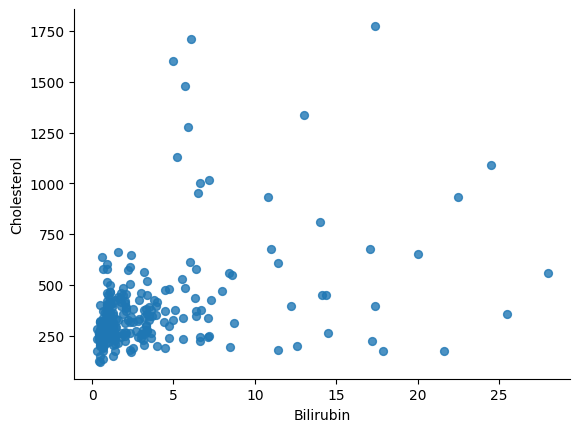

In [143]:
data.plot(kind='scatter',x='Bilirubin', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top','right',]].set_visible(False)

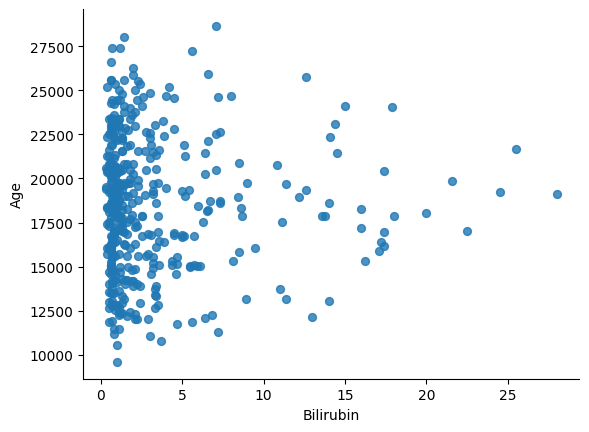

In [144]:
data.plot(kind='scatter',x='Bilirubin', y='Age', s=32, alpha=.8)
plt.gca().spines[['top','right',]].set_visible(False)

<Axes: xlabel='Sex'>

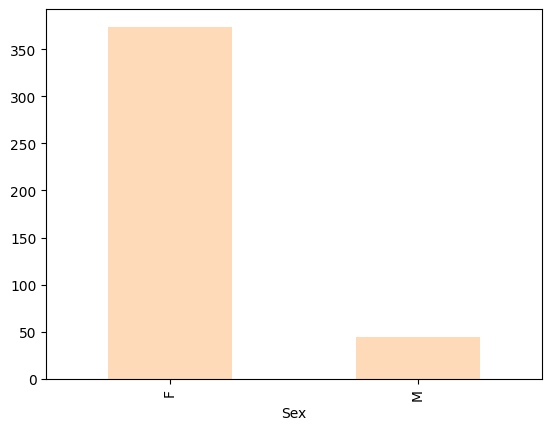

In [145]:
data['Sex'].value_counts().plot.bar(color='peachpuff')

<Axes: xlabel='Sex,Stage'>

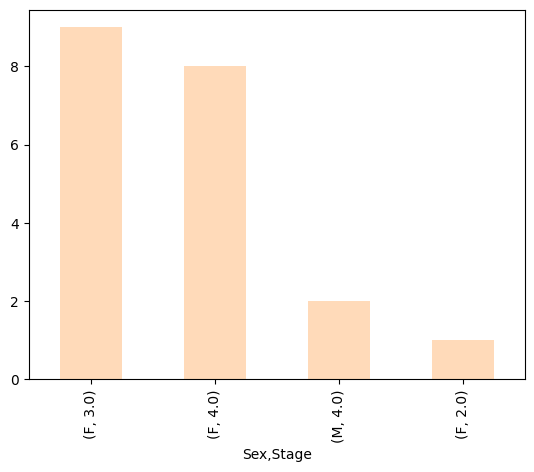

In [146]:
df=data[['Sex','Stage']]
df.iloc[0:20].value_counts().plot.bar(color='peachpuff')

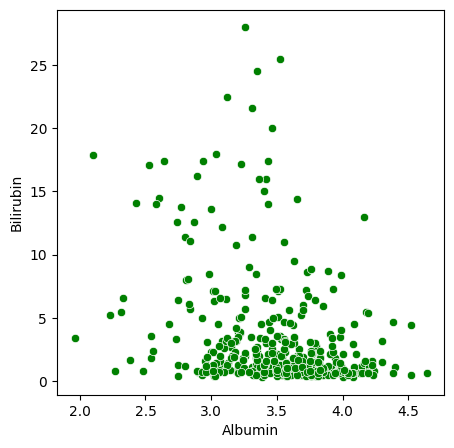

In [147]:
f, ax=plt.subplots(figsize=(5,5))
snr.scatterplot(x='Albumin',y='Bilirubin',color='green',data=data);
plt.show()

<Axes: xlabel='Sex'>

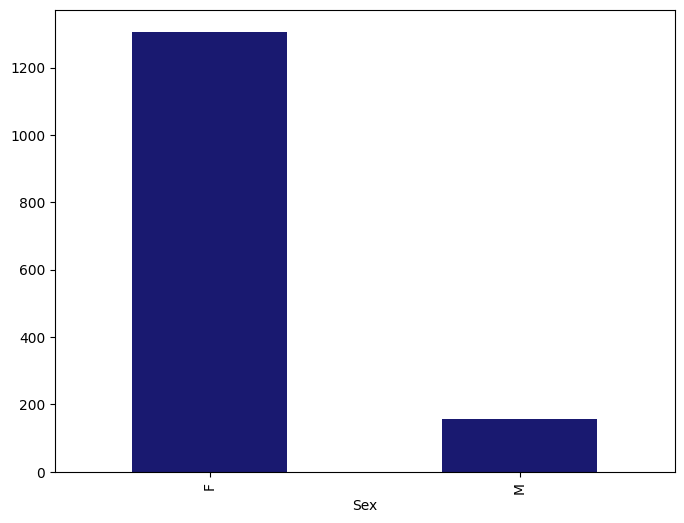

In [148]:
plt.figure(figsize=(8,6))
data.groupby('Sex').sum()['Albumin'].plot.bar(color='midnightblue')

<Axes: xlabel='Prothrombin'>

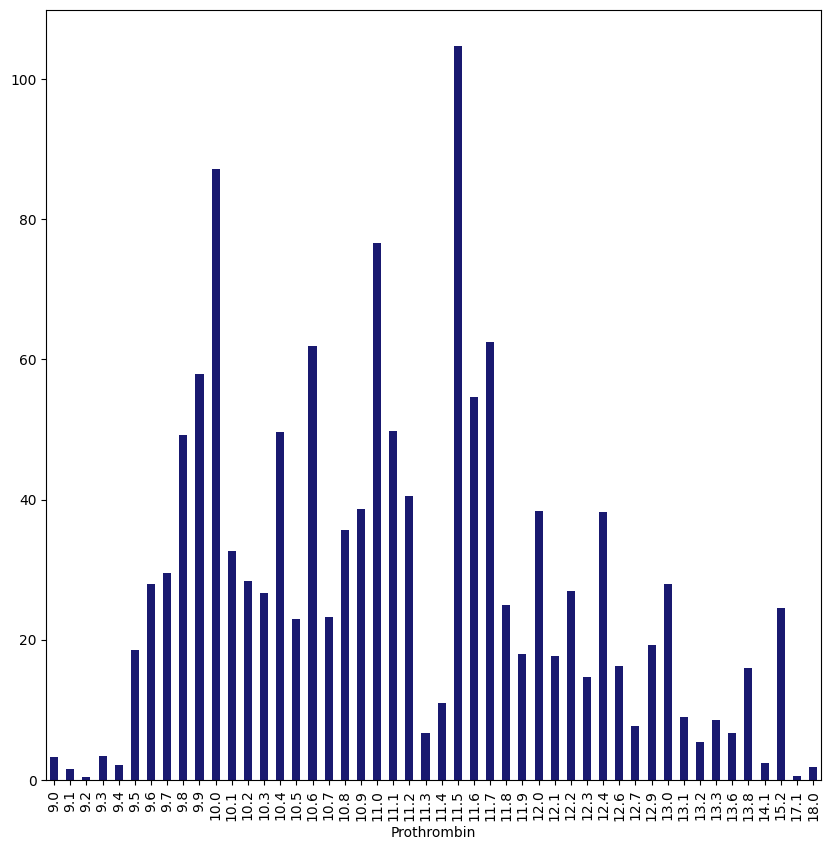

In [149]:
plt.figure(figsize=(10,10))
data.groupby('Prothrombin').sum()['Bilirubin'].plot.bar(color='midnightblue')

<Axes: xlabel='Prothrombin'>

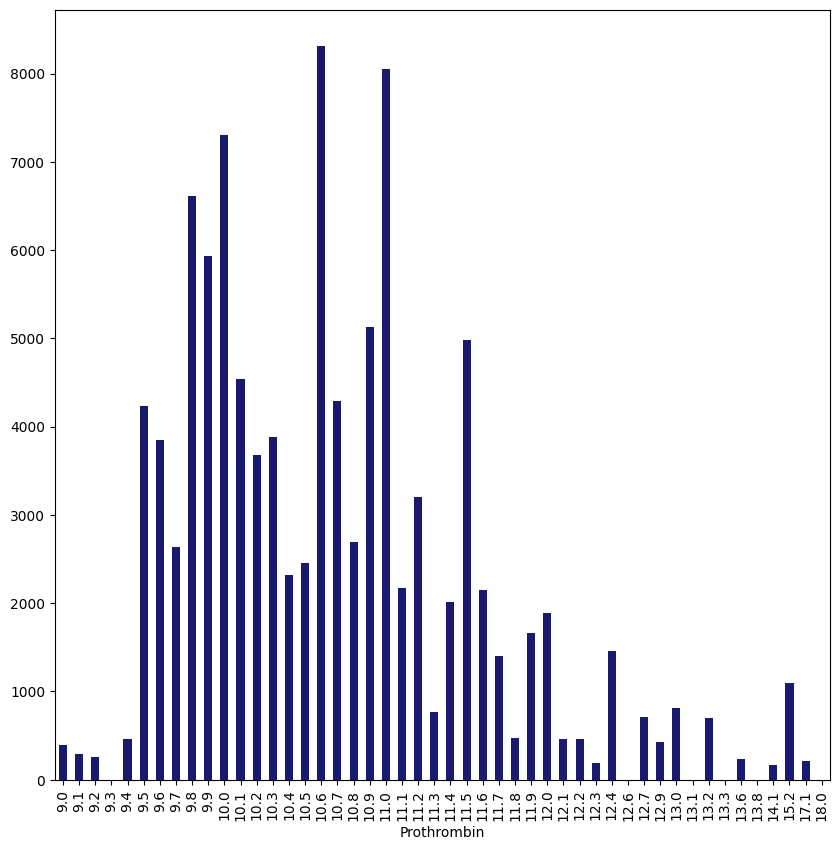

In [150]:
plt.figure(figsize=(10,10))
data.groupby('Prothrombin').sum()['Cholesterol'].plot.bar(color='midnightblue')

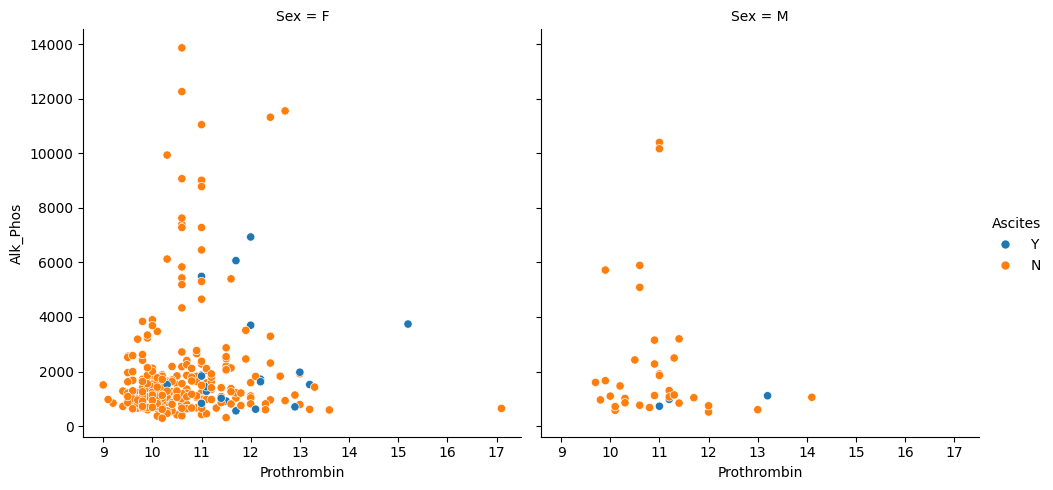

In [151]:
snr.relplot(x='Prothrombin',y='Alk_Phos',hue='Ascites',col='Sex',data=data)

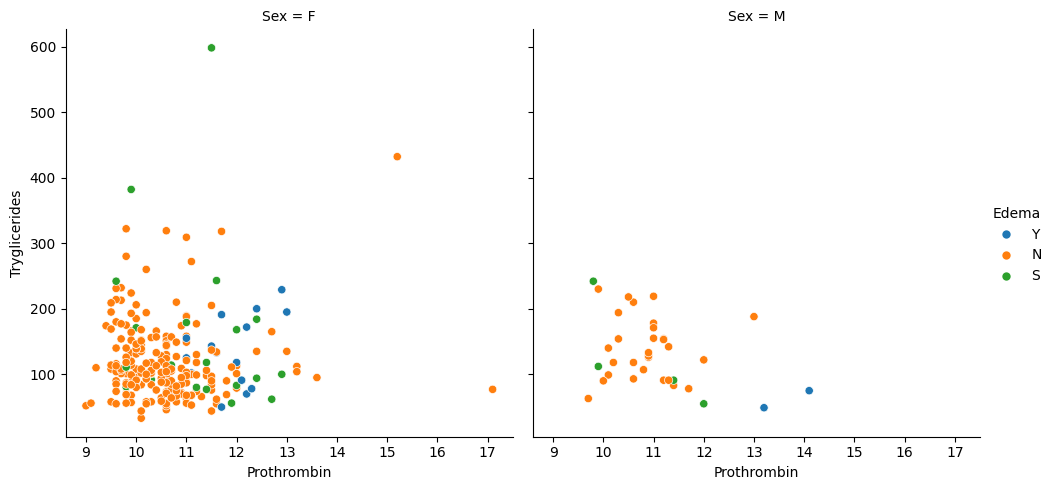

In [152]:
snr.relplot(x='Prothrombin',y='Tryglicerides',hue='Edema',col='Sex',data=data)

<Axes: xlabel='Alk_Phos', ylabel='Age'>

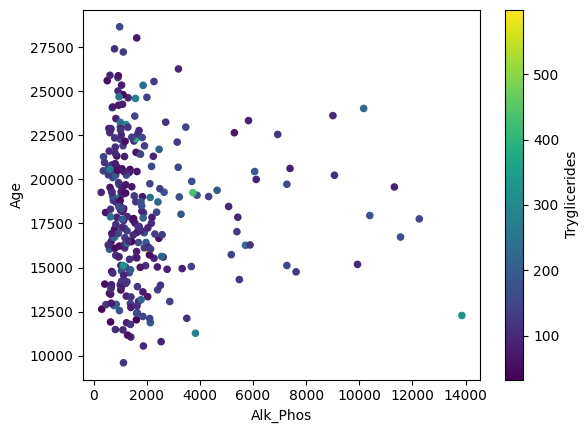

In [153]:
data.plot.scatter(x='Alk_Phos',y='Age',c='Tryglicerides')


<Axes: xlabel='Cholesterol', ylabel='Prothrombin'>

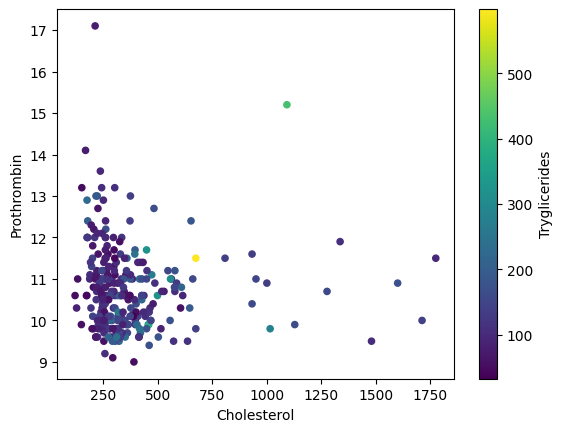

In [154]:
data.plot.scatter(x='Cholesterol',y='Prothrombin',c='Tryglicerides')

DATA CLEANING


In [155]:
data['Status']=data['Status'].apply({'C':1,'CL':2,'D':3}.get)
data['Drug']=data['Drug'].apply({'D-penicillamine':1,'Placebo':2}.get)
data['Sex']=data['Sex'].apply({'M':1,'F':2}.get)
data['Ascites']=data['Ascites'].apply({'N':0,'Y':1}.get)
data['Hepatomegaly']=data['Hepatomegaly'].apply({'N':0,'Y':1}.get)
data['Spiders']=data['Spiders'].apply({'N':0,'Y':1}.get)
data['Edema']=data['Edema'].apply({'N':0,'Y':1,'S':2}.get)

In [156]:
check_nan=data.isna().values.any()
print(check_nan)



True


In [157]:
Count_nan=data.isna().sum()
print(Count_nan)

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [158]:
data=data.replace([np.nan,-np.inf],0)


In [159]:
x=data[['ID','N_Days','Status','Drug','Age','Sex','Ascites','Hepatomegaly','Spiders','Edema','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']]
y=data['Stage']

In [160]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,3,1.0,21464,2,1.0,1.0,1.0,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,1.0,20617,2,0.0,1.0,1.0,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,3,1.0,25594,1,0.0,0.0,0.0,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,3,1.0,19994,2,0.0,1.0,1.0,2,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,2,2.0,13918,2,0.0,1.0,1.0,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

In [162]:
from sklearn import svm
SVC=svm.SVC(kernel='poly')
SVC.fit(x_train,y_train)



SVC(kernel='poly')

In [163]:
predictions=SVC.predict(x_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [165]:
print(cm)

[[ 0  0  0  1  0]
 [ 0  0  0  3  0]
 [ 0  0  0 12  1]
 [ 0  0  1 30  8]
 [ 0  0  1 15 12]]


In [166]:
print(ac)

0.5


Now we will classify a new patient and predict that the pateint is in which stage of Liver Cirrhosis.

In [167]:
#Classification of New Patient
my_data={'ID':2484,'N_Days':1100,'Status':2,'Drug':2,'Age':24640,'Sex':1,'Ascites':1,'Hepatomegaly':1,'Spiders':1,'Edema':1,'Bilirubin':3,'Cholesterol':240,'Albumin':2.5,'Copper':50,'Alk_Phos':1905.7,'SGOT':110,'Tryglicerides':150,'Platelets':195,'Prothrombin':11.1}
index=[1]

In [168]:
new_data=pd.DataFrame(my_data,index)


In [169]:
new_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
1,2484,1100,2,2,24640,1,1,1,1,1,3,240,2.5,50,1905.7,110,150,195,11.1


In [170]:
#Classification of a new employee
classification=SVC.predict(new_data)
print('The new employee will have',classification,'Stage of Cirrhosis')

The new employee will have [4.] Stage of Cirrhosis


**OUTPUT: The new patient is in stage 4 of Liver Cirrhosis.
